In [2]:
import numpy as np
from scipy.optimize import minimize
import astropy.constants as ac
import scipy.constants as c

In [3]:
absolute_mag = lambda m, d: m + 5 - 5*np.log10(d)
print("Absolute Magnitude of Tau Sco: {:.2f}".format(absolute_mag(2.8, 470*c.light_year/c.parsec)))

Absolute Magnitude of Tau Sco: -2.99


In [4]:
luminosity = lambda M, bc: 10**((M + bc - 4.74)/(-2.5))
print("Luminosity of Tau Sco: {:.2f} solar".format(luminosity(-2.99, -3.16)))

Luminosity of Tau Sco: 22698.65 solar


In [5]:
radius = lambda L, T: np.sqrt(L*ac.L_sun.value/(4*np.pi*c.sigma*(T**4)))/ac.R_sun.value
radius(22698.65, 30000)

5.577132336246148

In [6]:
mass = lambda L: L**(1/3.8)
mass(22698)

14.00594846824082

In [7]:
logg = lambda M, R: np.log10(100*c.G*M*ac.M_sun.value/((R*ac.R_sun.value)**2))
escape_velocity = lambda M, R: np.sqrt(2*c.G*M*ac.M_sun.value/(R*ac.R_sun.value))
print("Log(g): {:.2f}\nEscape Velocity: {:.2f} m/s".format(logg(14, 5.57), escape_velocity(14, 5.57)))

Log(g): 4.09
Escape Velocity: 979255.98 m/s


In [8]:
rho = lambda M, R: 3*M*ac.M_sun.value/(4*np.pi*((R*ac.R_sun.value)**3))*1e-3
print("Mean density: {:.2f} grams per cubic cm".format(rho(14, 5.57)))

Mean density: 0.11 grams per cubic cm


In [9]:
print(rho(1, 1))
print(logg(1, 1))
print(escape_velocity(1, 1))

1.4098262953659104
4.438067627303133
617674.7002752088


In [10]:
with open('ssmyz47_0200.txt') as file:
    i = 0
    data = []
    for line in file:
        if i % 5 == 0:
            data.append([float(s) for s in line.split()])
        i += 1
T = [d[-2] for d in data]
P = [d[-1] for d in data]

(3, 10)

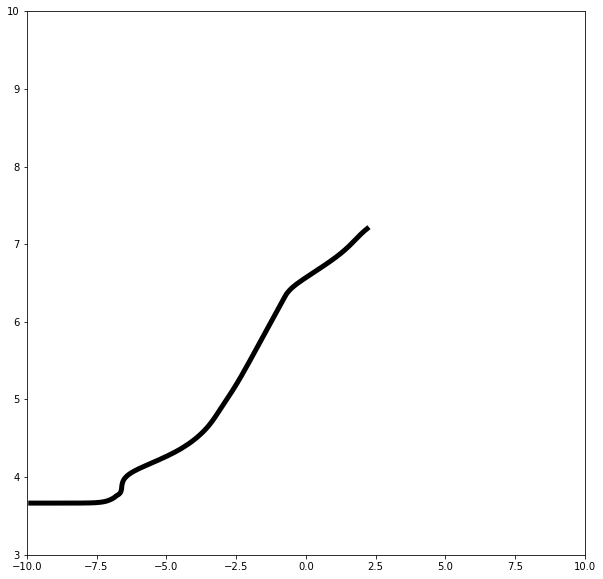

In [11]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(figsize=(10, 10))
pl.plot(np.log10(P), np.log10(T), color='k', linewidth=5)
pl.xlim(-10, 10)
pl.ylim(3, 10)

In [12]:
print("Number of scatterings: {:.2e}".format((ac.R_sun.value*100)**2.))
print("Time for photon to arrive at surface of the sun: {:.2e}".format(((ac.R_sun.value*100)**2)/3e10))

Number of scatterings: 4.84e+21
Time for photon to arrive at surface of the sun: 1.61e+11


Best fit coefficient: 106.01
Best fit power law index: 2.07


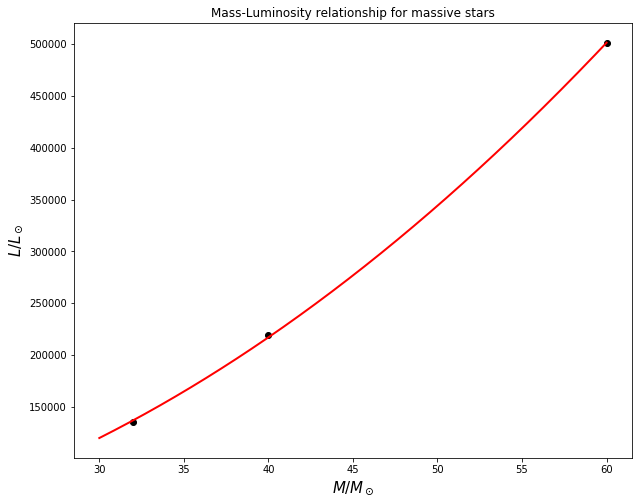

In [13]:
from scipy.optimize import curve_fit
M = np.array([32, 40, 60])
L = 10**(np.array([5.13, 5.34, 5.70]))

def model(M, a, alpha):
    return a*(M**alpha)

min_params = curve_fit(model, M, L)

fig = pl.figure(figsize=(10, 8))
pl.plot(M, L, 'ko')

x = np.linspace(30, 60, 500)
a, alpha = min_params[0]
pl.plot(x, model(x, a, alpha), color='r', linewidth=2)
pl.xlabel(r'$M/M_\odot$', size=15)
pl.ylabel(r'$L/L_\odot$', size=15)
pl.title('Mass-Luminosity relationship for massive stars')
print("Best fit coefficient: {:.2f}".format(a))
print("Best fit power law index: {:.2f}".format(alpha))

In [16]:
def ms_lifetime(x, M, logL):
    L = ac.L_sun.value*(10**logL)
    Mcore = x*M*ac.M_sun.value
    return (0.0071*x*Mcore*(c.c**2)/L)/(60*60*24*365.25)

print("Main sequence lifetime of 4 solar mass star: {:.2e}".format(ms_lifetime(0.2, 4, 2.37)))
print("Main sequence lifetime of 20 solar mass star: {:.2e}".format(ms_lifetime(0.4, 20, 4.61)))

Main sequence lifetime of 4 solar mass star: 7.17e+07
Main sequence lifetime of 20 solar mass star: 8.25e+06
